# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


# 1. Подготовка данных

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import time

In [0]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [0]:
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [0]:
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [0]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Рассчитаем recovery для этапов rougher и final по формуле и сравним со значениями, приведенными в таблице.

In [0]:
recovery_check_rougher = pd.DataFrame()
recovery_check_rougher['rougher.output.recovery'] = data_train['rougher.output.recovery']
recovery_check_rougher['C'] = data_train['rougher.output.concentrate_au']
recovery_check_rougher['F'] = data_train['rougher.input.feed_au']
recovery_check_rougher['T'] = data_train['rougher.output.tail_au']
recovery_check_rougher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 4 columns):
rougher.output.recovery    14287 non-null float64
C                          16778 non-null float64
F                          16777 non-null float64
T                          14611 non-null float64
dtypes: float64(4)
memory usage: 527.0 KB


In [0]:
recovery_check_rougher = recovery_check_rougher.dropna()
recovery_check_rougher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 4 columns):
rougher.output.recovery    14287 non-null float64
C                          14287 non-null float64
F                          14287 non-null float64
T                          14287 non-null float64
dtypes: float64(4)
memory usage: 558.1 KB


In [0]:
recovery_check_rougher['recovery'] = (
    (recovery_check_rougher['C'] * (recovery_check_rougher['F'] - recovery_check_rougher['T'])) /
    (recovery_check_rougher['F'] * (recovery_check_rougher['C'] - recovery_check_rougher['T']))
                                     ) * 100
recovery_check_rougher.head()

,rougher.output.recovery,C,F,T,recovery
0,87.107763,19.793808,6.486150,1.170244,87.107763
1,86.843261,20.050975,6.478583,1.184827,86.843261
2,86.842308,19.737170,6.362222,1.162562,86.842308
3,87.226430,19.320810,6.118189,1.079755,87.226430
4,86.688794,19.216101,5.663707,1.012642,86.688794


In [0]:
mean_absolute_error(recovery_check_rougher['rougher.output.recovery'], recovery_check_rougher['recovery'])

9.444891926100695e-15

In [0]:
recovery_check_final = pd.DataFrame()
recovery_check_final['final.output.recovery'] = data_train['final.output.recovery']
recovery_check_final['C'] = data_train['final.output.concentrate_au']
recovery_check_final['F'] = data_train['rougher.input.feed_au']
recovery_check_final['T'] = data_train['final.output.tail_au']
recovery_check_final = recovery_check_final.dropna()
recovery_check_final['recovery'] = (
    (recovery_check_final['C'] * (recovery_check_final['F'] - recovery_check_final['T'])) /
    (recovery_check_final['F'] * (recovery_check_final['C'] - recovery_check_final['T']))
                                   ) * 100
print(mean_absolute_error(recovery_check_final['final.output.recovery'], recovery_check_final['recovery']))
recovery_check_final.head()

8.158251945945868e-15


,final.output.recovery,C,F,T,recovery
0,70.541216,42.192020,6.486150,2.143149,70.541216
1,69.266198,42.701629,6.478583,2.224930,69.266198
2,68.116445,42.657501,6.362222,2.257889,68.116445
3,68.347543,42.689819,6.118189,2.146849,68.347543
4,66.927016,42.774141,5.663707,2.055292,66.927016


Значения абсолютной ошибки получились близки к нулю, вероятно из-за ошибок округления. Можно считать, что значения в таблице верные.

Обработаем во всех таблицах столбцы с датами.

In [0]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

Заменим в названиях столбцов точку на знак нижнего подчеркивания для более удобной работы с таблицами.

In [0]:
data_full = data_full.rename(columns=lambda x: x.replace('.', '_')) 
data_train = data_train.rename(columns=lambda x: x.replace('.', '_')) 
data_test = data_test.rename(columns=lambda x: x.replace('.', '_')) 

Получим список с названиями столбцов, отсутсвующими в тестовой выборке, но имеющихся в обучающей.

In [0]:
data_full_columns = data_full.columns
data_full_columns = pd.Series(data_full_columns)
data_test_columns = data_test.columns
data_test_columns = pd.Series(data_test_columns)
#data_test_columns
print(data_full_columns[~data_full_columns.isin(data_test_columns)])

1                           final_output_concentrate_ag
2                           final_output_concentrate_pb
3                          final_output_concentrate_sol
4                           final_output_concentrate_au
5                                 final_output_recovery
6                                  final_output_tail_ag
7                                  final_output_tail_pb
8                                 final_output_tail_sol
9                                  final_output_tail_au
14                primary_cleaner_output_concentrate_ag
15                primary_cleaner_output_concentrate_pb
16               primary_cleaner_output_concentrate_sol
17                primary_cleaner_output_concentrate_au
18                       primary_cleaner_output_tail_ag
19                       primary_cleaner_output_tail_pb
20                      primary_cleaner_output_tail_sol
21                       primary_cleaner_output_tail_au
30        rougher_calculation_sulfate_to_au_conc

Видим, что большинство столбцов это данные о различных концентрациях на различных этапы. Как указано в задании, эти параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 

В целом в таблицах много пропусков, требуется обработка для обучения моделей. Однако для анализа используем сырые данные, а обработку произведем перед построением моделей.

# 2. Анализ данных

Построим график изменения концентраций веществ на различных этапах очистки

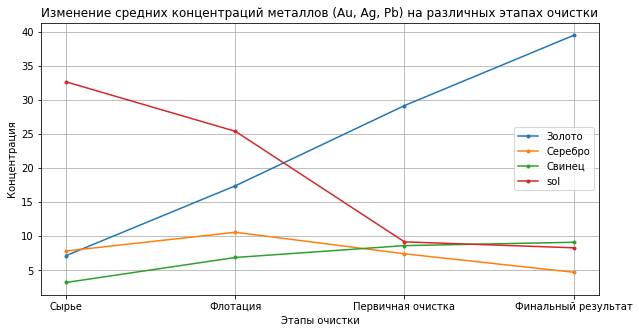

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(['Сырье', 'Флотация', 'Первичная очистка', 'Финальный результат'],
         [data_train['rougher_input_feed_au'].mean(),
          data_train['rougher_output_concentrate_au'].mean(),
          data_train['primary_cleaner_output_concentrate_au'].mean(),
          data_train['final_output_concentrate_au'].mean()], '.-')
plt.plot([data_train['rougher_input_feed_ag'].mean(),
          data_train['rougher_output_concentrate_ag'].mean(),
          data_train['primary_cleaner_output_concentrate_ag'].mean(),
          data_train['final_output_concentrate_ag'].mean()], '.-')
plt.plot([data_train['rougher_input_feed_pb'].mean(),
          data_train['rougher_output_concentrate_pb'].mean(),
          data_train['primary_cleaner_output_concentrate_pb'].mean(),
          data_train['final_output_concentrate_pb'].mean()], '.-')
plt.plot([data_train['rougher_input_feed_sol'].mean(),
          data_train['rougher_output_concentrate_sol'].mean(),
          data_train['primary_cleaner_output_concentrate_sol'].mean(),
          data_train['final_output_concentrate_sol'].mean()], '.-')

plt.title("Изменение средних концентраций металлов (Au, Ag, Pb) на различных этапах очистки")
plt.xlabel("Этапы очистки")
plt.ylabel("Концентрация")
plt.legend(['Золото', 'Серебро', 'Свинец', 'sol'])
plt.grid()
plt.show()

Построим графики распределения металлов на каждом из этапов очистки

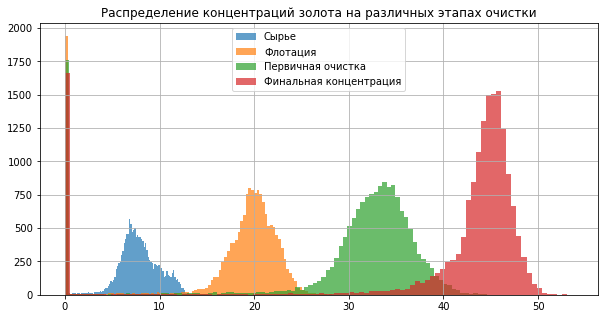

In [0]:
concentrate_au_list = ['rougher_input_feed_au', 'rougher_output_concentrate_au', 'primary_cleaner_output_concentrate_au',
           'final_output_concentrate_au', ]
plt.figure(figsize=(10, 5))
for i in concentrate_au_list:
    data_train[i].hist(bins=100, alpha=0.7)
plt.title("Распределение концентраций золота на различных этапах очистки")
plt.legend(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная концентрация'])
plt.show()

Из двух последних графиков явно видно, что концентрация необходимого металла - золота, растет на каждом этапе очистки. Что является ключевой целью. Также во всех графиков присутсвуют нулевые значения.

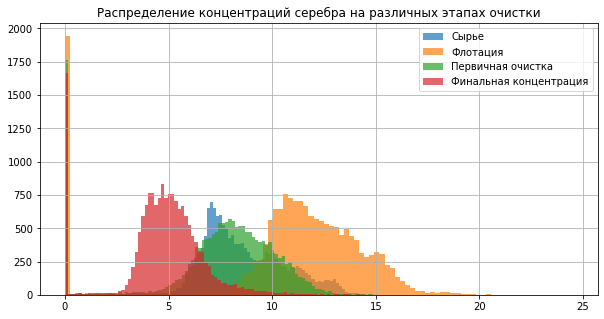

In [0]:
concentrate_ag_list = ['rougher_input_feed_ag', 'rougher_output_concentrate_ag', 'primary_cleaner_output_concentrate_ag',
           'final_output_concentrate_ag']
plt.figure(figsize=(10, 5))
for i in concentrate_ag_list:
    data_train[i].hist(bins=100, alpha=0.7)
plt.title("Распределение концентраций серебра на различных этапах очистки")
plt.legend(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная концентрация'])
plt.show()

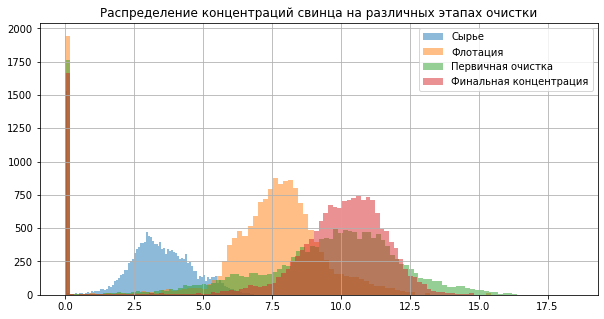

In [0]:
concentrate_pb_list = ['rougher_input_feed_pb', 'rougher_output_concentrate_pb', 'primary_cleaner_output_concentrate_pb',
           'final_output_concentrate_pb']
plt.figure(figsize=(10, 5))
for i in concentrate_pb_list:
    data_train[i].hist(bins=100, alpha=0.5)
plt.title("Распределение концентраций свинца на различных этапах очистки")
plt.legend(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная концентрация'])
plt.show()

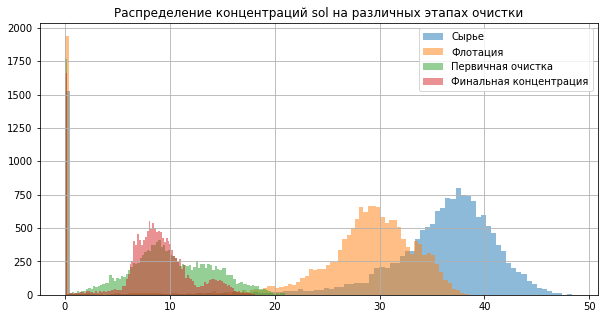

In [0]:
concentrate_sol_list = ['rougher_input_feed_sol', 'rougher_output_concentrate_sol', 'primary_cleaner_output_concentrate_sol',
           'final_output_concentrate_sol']
plt.figure(figsize=(10, 5))
for i in concentrate_sol_list:
    data_train[i].hist(bins=100, alpha=0.5)
plt.title("Распределение концентраций sol на различных этапах очистки")
plt.legend(['Сырье', 'Флотация', 'Первичная очистка', 'Финальная концентрация'])
plt.show()

В ходе очистки концетрация свинца растет, а серебра и sol падает, однако данные параметры в ходе данной работы не важны и не рассмотриваются. В добавок к этому, эти значения в тестовой выборке отсутвуют, соответвенно и в обучающей их придется удалить и они не будут принимать участие в обучении модели.

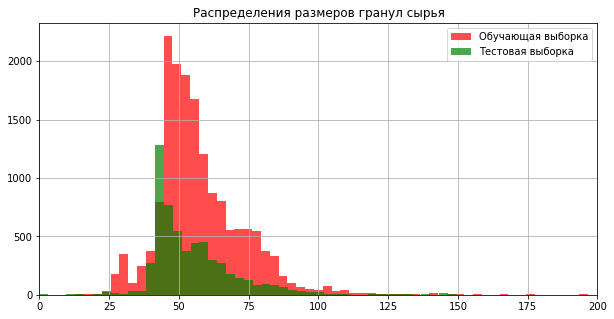

In [0]:
plt.figure(figsize=(10, 5))
data_train['rougher_input_feed_size'].hist(bins=150, alpha=0.7, color = 'red')
data_test['rougher_input_feed_size'].hist(bins=150, alpha=0.7, color = 'green')
plt.xlim(0, 200)
plt.title("Распределения размеров гранул сырья")
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

Графики распределения размеров гранул сырья в выборках похожи, однако данный график, на мой вгляд, не особо показателен. Сравним численные значения, посмотрим ящики с усами и график распределения, но в стандартизированном виде.

In [0]:
print('Данные о размере сырья в обучающей выборке:')
print(data_train['rougher_input_feed_size'].describe())
print()
print('Данные о размере сырья в тестовой выборке:')
print(data_test['rougher_input_feed_size'].describe())

Данные о размере сырья в обучающей выборке:
count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher_input_feed_size, dtype: float64

Данные о размере сырья в тестовой выборке:
count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher_input_feed_size, dtype: float64


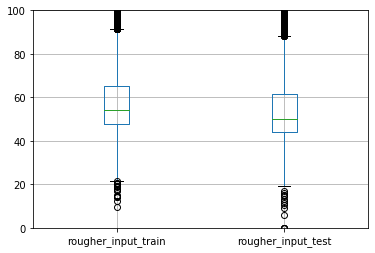

In [0]:
data_for_boxplot_rougher = pd.DataFrame()
data_for_boxplot_rougher['rougher_input_train'] = data_train['rougher_input_feed_size']
data_for_boxplot_rougher['rougher_input_test'] = data_test['rougher_input_feed_size']

data_for_boxplot_rougher.boxplot()
plt.ylim(0, 100)
plt.show()

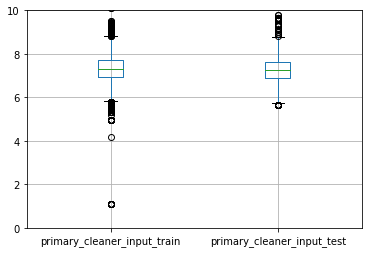

In [0]:
data_for_boxplot_cleaner = pd.DataFrame()
data_for_boxplot_cleaner['primary_cleaner_input_train'] = data_train['primary_cleaner_input_feed_size']
data_for_boxplot_cleaner['primary_cleaner_input_test'] = data_test['primary_cleaner_input_feed_size']

data_for_boxplot_cleaner.boxplot()
plt.ylim(0, 10)
plt.show()

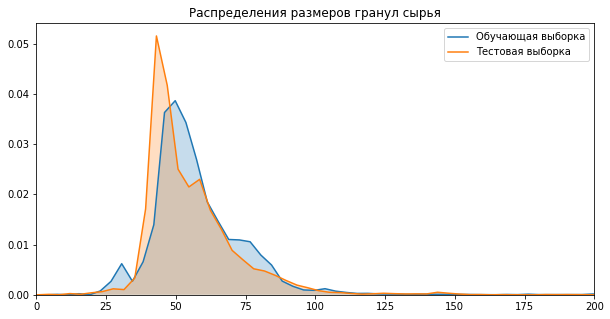

In [0]:
plt.figure(figsize=(10, 5))
snsplot = sns.kdeplot(data_train['rougher_input_feed_size'], shade=True)
snsplot = sns.kdeplot(data_test['rougher_input_feed_size'], shade=True)
plt.title("Распределения размеров гранул сырья")
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.xlim(0, 200)
plt.show()

Из данных чисел и графиков более явно видно, что размеры сравнимы и модель будет адекватно их воспринимать.

Посчитаем суммарные концетрации веществ на различных этапах.

In [0]:
print('Суммарная концентрация в сырье:', (data_train['rougher_input_feed_au'].mean() + 
data_train['rougher_input_feed_ag'].mean() + 
data_train['rougher_input_feed_pb'].mean() +
data_train['rougher_input_feed_sol'].mean()).round(decimals=2), '%')

print('Суммарная концентрация после флотации:', (data_train['rougher_output_concentrate_au'].mean() + 
data_train['rougher_output_concentrate_ag'].mean() + 
data_train['rougher_output_concentrate_pb'].mean() +
data_train['rougher_output_concentrate_sol'].mean()).round(decimals=2), '%')

print('Суммарная концентрация после очистки:', (data_train['primary_cleaner_output_concentrate_au'].mean() + 
data_train['primary_cleaner_output_concentrate_ag'].mean() + 
data_train['primary_cleaner_output_concentrate_pb'].mean() +
data_train['primary_cleaner_output_concentrate_sol'].mean()).round(decimals=2), '%')

print('Суммарная финальная концентрация:', (data_train['final_output_concentrate_sol'].mean() + 
data_train['final_output_concentrate_pb'].mean() + 
data_train['final_output_concentrate_ag'].mean() + 
data_train['final_output_concentrate_au'].mean()).round(decimals=2), '%')

Суммарная концентрация в сырье: 50.86 %
Суммарная концентрация после флотации: 60.25 %
Суммарная концентрация после очистки: 54.38 %
Суммарная финальная концентрация: 61.6 %


Посмотрим распределения суммарных концентраций на различных этапах.

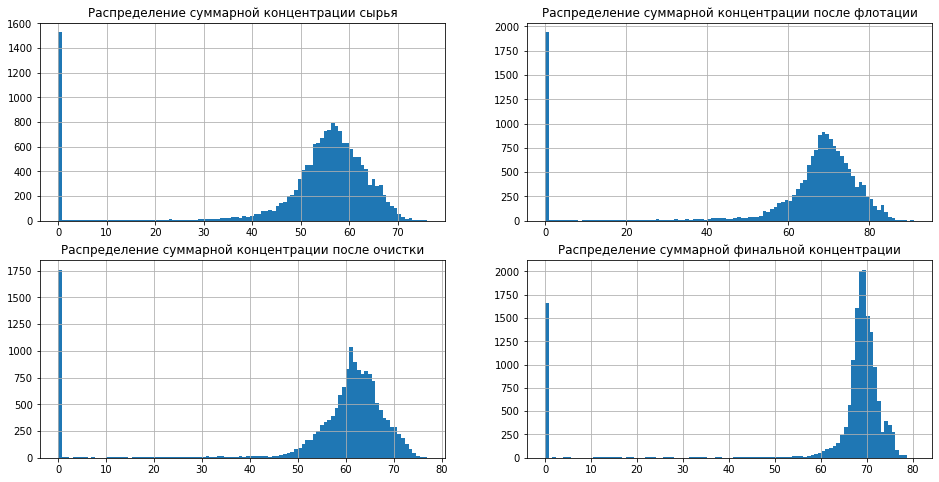

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
(data_train['rougher_input_feed_au'] + 
data_train['rougher_input_feed_ag'] + 
data_train['rougher_input_feed_pb'] + 
data_train['rougher_input_feed_sol']).hist(bins=100)
plt.title("Распределение суммарной концентрации сырья")

plt.subplot(2, 2, 2)
data_concentrate_rougher_input_sum = (data_train['rougher_output_concentrate_au'] + 
data_train['rougher_output_concentrate_ag'] + 
data_train['rougher_output_concentrate_pb'] + 
data_train['rougher_output_concentrate_sol'])
data_concentrate_rougher_input_sum.hist(bins=100)
plt.title("Распределение суммарной концентрации после флотации")

plt.subplot(2, 2, 3)
(data_train['primary_cleaner_output_concentrate_au'] + 
data_train['primary_cleaner_output_concentrate_ag'] + 
data_train['primary_cleaner_output_concentrate_pb'] + 
data_train['primary_cleaner_output_concentrate_sol']).hist(bins=100)
plt.title("Распределение суммарной концентрации после очистки")

plt.subplot(2, 2, 4)
data_concentrate_final_output_sum = (data_train['final_output_concentrate_sol'] + 
data_train['final_output_concentrate_pb'] + 
data_train['final_output_concentrate_ag'] + 
data_train['final_output_concentrate_au'])
data_concentrate_final_output_sum.hist(bins=100)
plt.title("Распределение суммарной финальной концентрации")
plt.show()

# 3. Модель

Напишем функции для расчета sMAPE для этапов очистки и итоговой sMAPE.

In [0]:
def smape_calc_func(y_true, y_pred):
    return (np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)).mean() *100

smape_score = make_scorer(smape_calc_func, greater_is_better = True)

def smape_total(rougher, final):
    return (0.25 * rougher + 0.75 * final)

Создадим отдельный датафрейм для обучающей выборки. Оставим только те столбцы, которые есть в тестовой выборке. Также дропнем столбцнц с датой. 

Лучшие показания моделей получаются при удалении всех строк, где есть пропуски. Заполнения пропусков прошлыми значениями, средними значениями по столбцу приводят к ухудшению метрики sMAPE.

Обучение и предсказание произведем два раза, сначала для rougher_output_recovery, потом для final_output_recovery. Ввиду этого у нас будет две выборки с признакми, два списка с целевыми признаками. Стандартизацию данных также произведем два раза.

In [0]:
# Удалим столбец с датой
data_train_for_model = data_train.drop(['date'], axis=1)
# Оставим столбцы, имеющиеся в тестовом наборе данных
data_train_for_model = data_train_for_model.drop(data_full_columns[~data_full_columns.isin(data_test_columns)], axis=1)
# Добавим столбцы с целевыми признаками
data_train_for_model['rougher_output_recovery'] = data_train['rougher_output_recovery']
data_train_for_model['final_output_recovery'] = data_train['final_output_recovery']
# Удалим пропуски
data_train_for_model = data_train_for_model.dropna().reset_index(drop = True)
# Получим два набора признаков и целевых признаков
features_train_two = data_train_for_model.drop(['final_output_recovery'], axis=1)
features_train_one = data_train_for_model.drop(['rougher_output_recovery', 'final_output_recovery'], axis=1)
target_train_one = data_train_for_model['rougher_output_recovery']
target_train_two = data_train_for_model['final_output_recovery']
# Стандартизируем признаки для первой модели
scaler_one = StandardScaler()
scaler_one.fit(features_train_one)
features_train_one = scaler_one.transform(features_train_one)
# Стандартизируем признаки для второй модели
scaler_two = StandardScaler()
scaler_two.fit(features_train_two)
features_train_two = scaler_two.transform(features_train_two)

In [0]:
#%%time
print('Линейная регрессия:')
model_lr_one = LinearRegression()
final_score_lr_one = (cross_val_score(model_lr_one, features_train_one, target_train_one, cv=5, scoring=smape_score).mean())
print('sMAPE (rougher):', final_score_lr_one.round(decimals=2), '%')

model_lr_two = LinearRegression()
final_score_lr_two = (cross_val_score(model_lr_two, features_train_two, target_train_two, cv=5, scoring=smape_score).mean())
print('sMAPE (final):', final_score_lr_two.round(decimals=2), '%')

print('Итоговое sMAPE:', smape_total(final_score_lr_one, final_score_lr_two).round(decimals=2), '%')

Линейная регрессия:
sMAPE (rougher): 10.85 %
sMAPE (final): 10.7 %
Итоговое sMAPE: 10.74 %


In [0]:
#%%time
print('Случайный лес:')
model_forest_one = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345)
final_score_forest_one = (cross_val_score(
    model_forest_one, features_train_one, target_train_one, cv=5, scoring=smape_score).mean())
print('sMAPE (rougher):', final_score_forest_one.round(decimals=2), '%')

model_forest_two = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=12345)
final_score_forest_two = (cross_val_score(
    model_forest_two, features_train_two, target_train_two, cv=5, scoring=smape_score).mean())
print('sMAPE (final):', final_score_forest_two.round(decimals=2), '%')

print('Итоговое sMAPE:', smape_total(final_score_forest_one, final_score_forest_two).round(decimals=2), '%')

Случайный лес:
sMAPE (rougher): 10.25 %
sMAPE (final): 8.15 %
Итоговое sMAPE: 8.67 %


Лучшее значение метрики sMAPE = 8.67% получилось для моделей случайного леса.

Для проверки моделей, в тестовую выборку добавим целевые признакми из полной таблицы, обучим модели и посмотрим на метрику sMAPE.

In [0]:
# В отдельный тестовый датафрейм добавим исходный тестовый, а также два столбца из полной таблицы
data_for_model_test = data_test.merge(data_full[['date', 'final_output_recovery', 'rougher_output_recovery']], how='left')
# Удалим строки с пропусками и сбросим индексы
data_for_model_test = data_for_model_test.dropna().reset_index(drop = True)
# Удалим столбец с датой
data_for_model_test = data_for_model_test.drop(['date'], axis=1)
# Получим два набора признаков и целевых признаков. Причем для обучения второй модели будем пользоваться предсказаниями первой,
# но в features_test_two оставим столбец с истинными значенями rougher_output_recovery, которые после перезапишем 
# на предсказания первой модели
features_test_two = data_for_model_test.drop(['final_output_recovery'], axis=1)
features_test_one = data_for_model_test.drop(['rougher_output_recovery', 'final_output_recovery'], axis=1)
target_test_one = data_for_model_test['rougher_output_recovery']
target_test_two = data_for_model_test['final_output_recovery']
# Стандартизируем признаки для первой модели
features_test_one = scaler_one.transform(features_test_one)

# Запишем истинные значения recovery в отдельную таблицу, в которую позже добавим значения предсказаний для удобного 
# подсчета sMAPE
recovery_test_true = pd.DataFrame()
recovery_test_true['rougher_output_recovery'] = data_for_model_test['rougher_output_recovery'] 
recovery_test_true['final_output_recovery'] = data_for_model_test['final_output_recovery'] 
# Обучим первую модель и предскажем показания rougher_output_recovery
model_rougher_output_recovery = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=12345)
model_rougher_output_recovery.fit(features_train_one, target_train_one)
rougher_output_recovery_prediction = model_rougher_output_recovery.predict(features_test_one)
# Предсказанные значения добавим в нашу сводную таблицу с суффиксом _prediction
recovery_test_true['rougher_output_recovery_prediction'] = rougher_output_recovery_prediction
# В признаках для обучения второй модели перезапишем истинные значения rougher_output_recovery на предсказанные раннее
features_test_two['rougher_output_recovery'] = recovery_test_true['rougher_output_recovery_prediction']
# Стандартизируем обновленные признаки для второй модели 
features_test_two = scaler_two.transform(features_test_two)
# Обучим вторую модель и предскажем показания final_output_recovery
model_final_output_recovery = RandomForestRegressor(n_estimators=20, max_depth=3, random_state=12345)
model_final_output_recovery.fit(features_train_two, target_train_two)
final_output_recovery_prediction = model_final_output_recovery.predict(features_test_two)
# Предсказанные значения добавим в нашу сводную таблицу с суффиксом _prediction
recovery_test_true['final_output_recovery_prediction'] = final_output_recovery_prediction
# Посчитаем значения метрики sMAPE для rougher, final и итоговую
smape_rougher_test = smape_calc_func(recovery_test_true['rougher_output_recovery'],
                                     recovery_test_true['rougher_output_recovery_prediction'])
smape_final_test = smape_calc_func(recovery_test_true['final_output_recovery'],
                                     recovery_test_true['final_output_recovery_prediction'])
print('sMAPE для тестовой выборки с использованием модели случайного леса:')
print('sMAPE (rougher):', smape_rougher_test.round(decimals=2), '%')
print('sMAPE (final):', smape_final_test.round(decimals=2), '%')
print('Итоговое sMAPE:', smape_total(smape_rougher_test, smape_final_test).round(decimals=2), '%')

sMAPE для тестовой выборки с использованием модели случайного леса:
sMAPE (rougher): 9.89 %
sMAPE (final): 9.57 %
Итоговое sMAPE: 9.65 %


In [0]:
rougher_output_recovery_constant = pd.Series(target_train_one.mean(), index=recovery_test_true.index)
final_output_recovery_constant = pd.Series(target_train_two.mean(), index=recovery_test_true.index)
smape_rougher_const = smape_calc_func(recovery_test_true['rougher_output_recovery'],
                                     rougher_output_recovery_constant)
smape_final_const = smape_calc_func(recovery_test_true['final_output_recovery'],
                                     final_output_recovery_constant)

print('sMAPE для константной модели:')
print('sMAPE (rougher):', smape_rougher_const.round(decimals=2), '%')
print('sMAPE (final):', smape_final_const.round(decimals=2), '%')
print('Итоговое sMAPE:', smape_total(smape_rougher_const, smape_final_const).round(decimals=2), '%')

sMAPE для константной модели:
sMAPE (rougher): 9.99 %
sMAPE (final): 9.66 %
Итоговое sMAPE: 9.74 %


Выбранная модель показывает лучшие значения метрики sMAPE на тестовой выборке, чем константная. Следовательно, модель адекватна.